# Task 1 - Classification technique for prediction of Graduate Admissions from an Indian perspective

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Preprocessing the data

In [2]:
data = pd.read_csv('Admission_Predict.csv')

# Splitting features and target variable
X = data.drop(['Chance of Admit '], axis=1)  
y = data['Chance of Admit ']
# Preprocessing if required (e.g., handling missing values or categorical variables)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Scaling the feature data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
data.shape

(400, 9)

In [7]:
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
120,121,335,117,5,5.0,5.0,9.56,1,0.94
57,58,298,99,2,4.0,2.0,7.60,0,0.46
206,207,315,99,2,3.5,3.0,7.89,0,0.63
393,394,317,104,2,3.0,3.0,8.76,0,0.77
212,213,338,120,4,5.0,5.0,9.66,1,0.95


Data Analysis

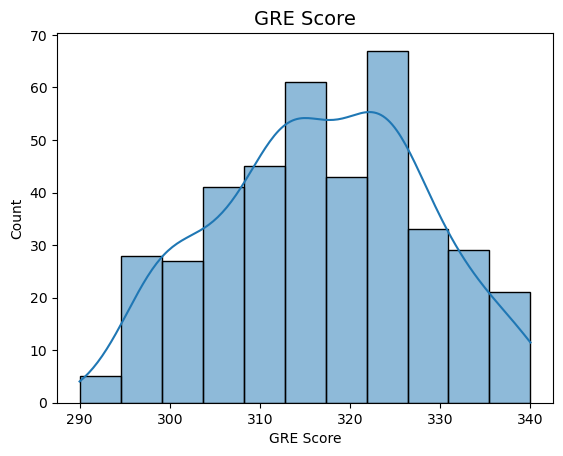

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data["GRE Score"], kde=True)
plt.title("GRE Score", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Count")
plt.show()

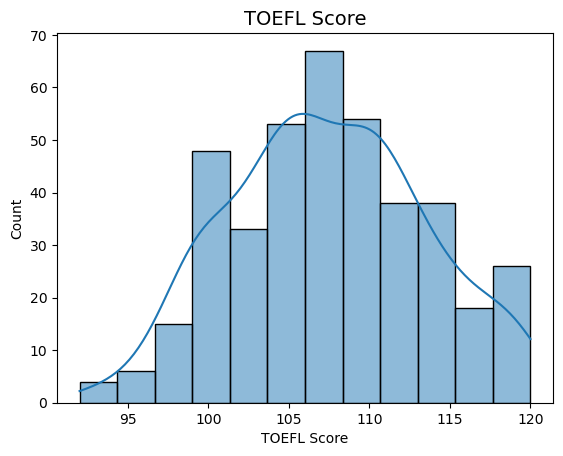

In [9]:
sns.histplot(data["TOEFL Score"], kde=True)
plt.title("TOEFL Score", fontsize=14)
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()

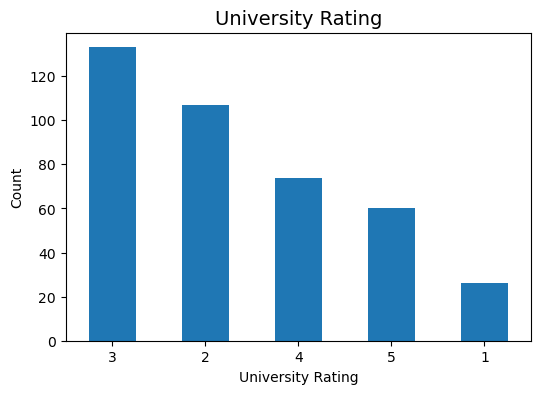

In [10]:
data["University Rating"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("University Rating", fontsize=14)
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

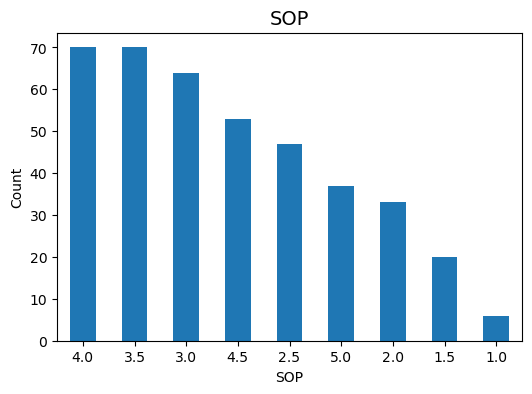

In [11]:
data["SOP"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("SOP", fontsize=14)
plt.xlabel("SOP")
plt.ylabel("Count")
plt.show()

Modelling the data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 8), (80, 8), (320,), (80,))

Classification technique: Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
threshold=0.5
y_train_binary=np.where(y_train>threshold,1,0)
y_test_binary=np.where(y_test>threshold,1,0)
model=LogisticRegression
model.fit(x_train,y_train_binary)

TypeError: fit() missing 1 required positional argument: 'y'

In [32]:
lr_y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
lr_accuracy=accuracy_score(y_test_binary,lr_y_pred)
print("Accuracy:",lr_accuracy)
lr_classification_rep=classification_report(y_test_binary,lr_y_pred)
print("Classification report:",lr_classification_rep)

NameError: name 'X_test' is not defined